## Imports

In [8]:
import pandas as pd
import numpy as np
from SLP import SLP
from Adaline import Adaline
from Preprocessing import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

## Data Reading

In [9]:
all_data = pd.read_csv('birds.csv')

In [10]:
all_data.head()

,gender,body_mass,beak_length,beak_depth,fin_length,bird category
0,male,3750,39.1,18.7,181,A
1,female,3800,39.5,17.4,186,A
2,female,3250,40.3,18.0,195,A
3,female,3500,39.6,17.7,186,A
4,female,3450,36.7,19.3,193,A


### Corelation Matrix

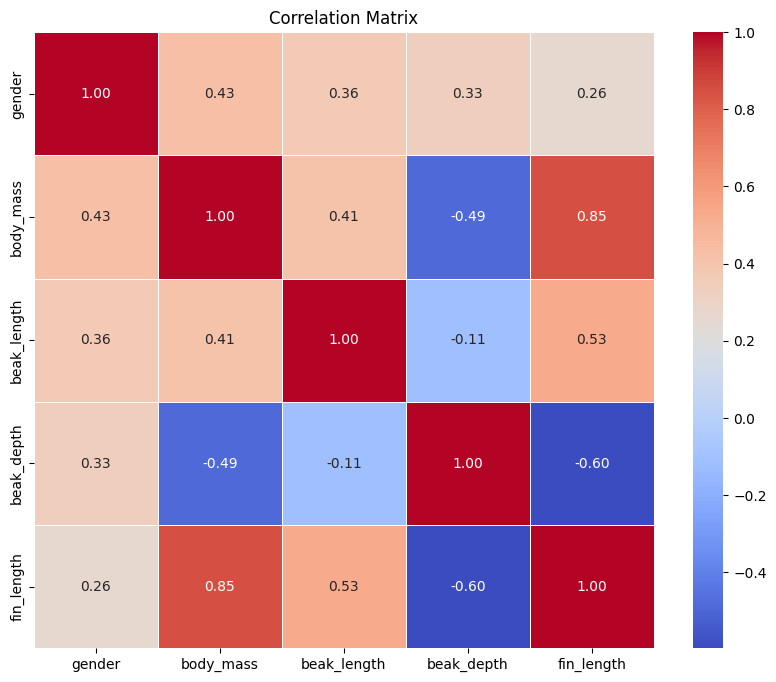

In [11]:
corr_data = all_data.iloc[:, :-1]
preprocessing(data=corr_data)
last_column = all_data.iloc[:, -1]


correlation_matrix = corr_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()




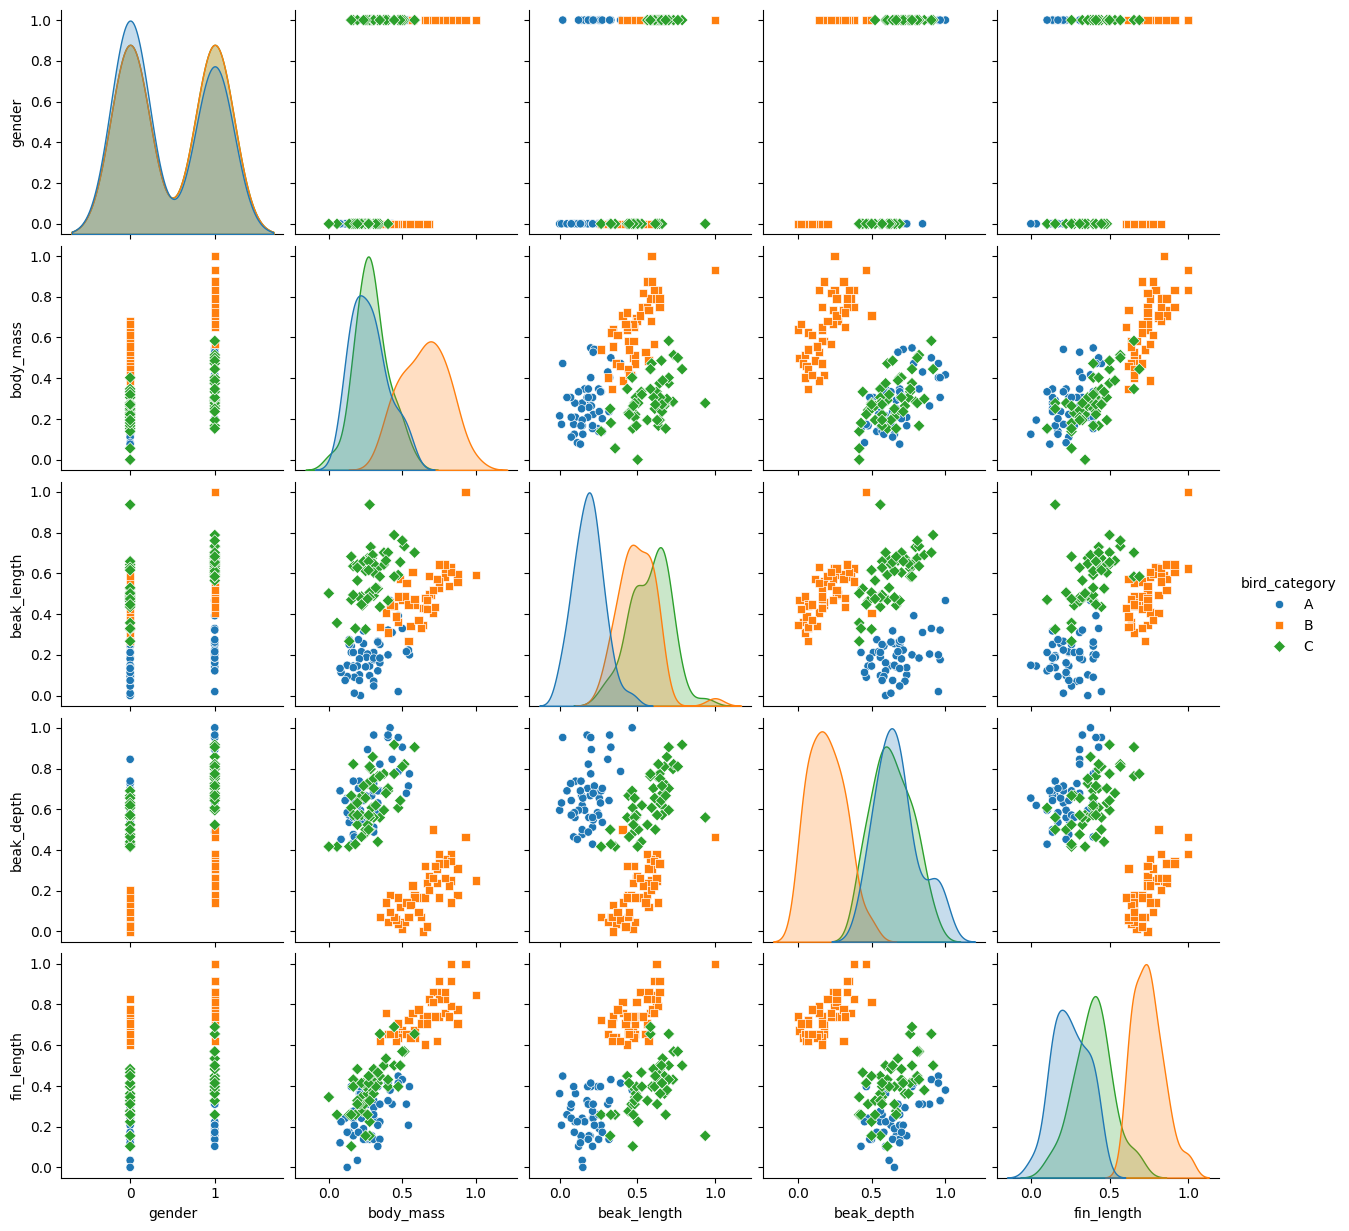

In [12]:
all_prosses_data = corr_data
all_prosses_data["bird_category"] = last_column.values


sns.pairplot(all_prosses_data, hue="bird_category", markers=["o", "s", "D"])  # Adjust markers if you have multiple classes
plt.show()


## Data Slicing

### Feature Selecting

In [13]:
feature_index = {'gender':0,'body_mass':1, 'beak_length':2, 'beak_depth':3, 'fin_length':4}

In [14]:
feature1, feature2 = 'body_mass', 'beak_depth'  # will be taken from the gui
f1, f2 = feature_index[feature1], feature_index[feature2]

### Class Selecting 

In [15]:
class_index = {'A':0, 'B':1, 'C':2}

In [16]:
class1, class2 = 'B', 'C' # will be taken from the gui
b1, b2 = class_index[class1]*50, class_index[class2]*50
e1, e2 = b1+50, b2+50

print(f"Class {class1}: {b1} -> {e1}")
print(f"Class {class2}: {b2} -> {e2}")

Class B: 50 -> 100
Class C: 100 -> 150


### Slicing

In [17]:
C1 = all_data.iloc[b1:e1,[f1, f2, 5]]
C2 = all_data.iloc[b2:e2,[f1, f2, 5]]

print(C1.shape)
print(C2.shape)

(50, 3)
(50, 3)


In [18]:
# shuffle
C1 = C1.sample(frac=1).reset_index(drop=True)
C2 = C2.sample(frac=1).reset_index(drop=True)

## Data Splitting

In [19]:
train = pd.concat([C1.iloc[0:30], C2.iloc[0:30]])
test = pd.concat([C1.iloc[30:], C2.iloc[30:]])

print(train.shape)
print(test.shape)

(60, 3)
(40, 3)


In [20]:
# shuffle
train = train.sample(frac=1).reset_index(drop=True)
test = test.sample(frac=1).reset_index(drop=True)

In [21]:
train.head()

,body_mass,beak_depth,bird category
0,6300,15.2,B
1,3900,19.5,C
2,4400,14.5,B
3,4750,15.0,B
4,5100,15.1,B


In [22]:
X_train = train.iloc[:,0:2]
X_test = test.iloc[:,0:2]

print(X_train.shape)
print(X_test.shape)

(60, 2)
(40, 2)


In [23]:
X_train.head()

,body_mass,beak_depth
0,6300,15.2
1,3900,19.5
2,4400,14.5
3,4750,15.0
4,5100,15.1


In [24]:
Y_train = pd.DataFrame(train.iloc[:,2])
Y_test = pd.DataFrame(test.iloc[:,2])

print(Y_train.shape)
print(Y_test.shape)

(60, 1)
(40, 1)


In [25]:
Y_train.head()

,bird category
0,B
1,C
2,B
3,B
4,B


# Model

In [26]:
model_to_use, learning_rate, n_epochs = 'Adaline', 0.01, 30  # will be taken from the gui

if model_to_use == 'SLP':
    my_model = SLP(learning_rate=learning_rate, n_epochs=n_epochs)
elif model_to_use == 'Adaline':
    my_model = Adaline(learning_rate=learning_rate, n_epochs=n_epochs)

# Training

In [27]:
preprocessing(data=X_train)
preprocessing(data=Y_train, classes=[class1, class2])

In [28]:
X_train.head()

,body_mass,beak_depth
0,1.000000,0.246575
1,0.333333,0.835616
2,0.472222,0.150685
3,0.569444,0.219178
4,0.666667,0.232877


In [29]:
my_model.fit(X=X_train, Y=Y_train)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [30]:
Y_train_pred = my_model.predict(X=X_train, column_name='bird category')
Y_train_pred.head()

,bird category
0,1
1,-1
2,1
3,1
4,1


In [31]:
# my_model.plot_decision_boundary(X=X_train, Y=Y_train)

# Testing

In [32]:
preprocessing(data=X_test)
preprocessing(data=Y_test, classes=[class1, class2])

In [33]:
Y_test_pred = my_model.predict(X=X_test, column_name='bird category')
Y_test_pred.head()

,bird category
0,-1
1,1
2,1
3,1
4,-1


# Evaluation

## Train

In [34]:
accuracy = my_model.accuracy_score(Y=Y_train, Y_predict=Y_train_pred)
print(f"train accuracy = {accuracy}")

train accuracy = 1.0


In [35]:
confusion_matrix = my_model.confusion_matrix(Y=Y_train, Y_pred=Y_train_pred)
confusion_matrix

,Positive,Negative
Positive,30,0
Negative,0,30


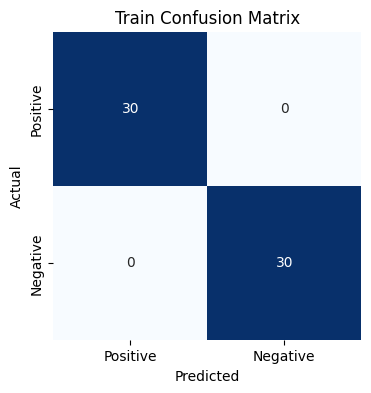

In [36]:
my_model.display_confusion_matrix(confusion_matrix, "Train Confusion Matrix")

## Test

In [37]:
accuracy = my_model.accuracy_score(Y=Y_test, Y_predict=Y_test_pred)
print(f"test accuracy = {accuracy}")

test accuracy = 1.0


In [38]:
confusion_matrix = my_model.confusion_matrix(Y=Y_test, Y_pred=Y_test_pred)
confusion_matrix

,Positive,Negative
Positive,20,0
Negative,0,20


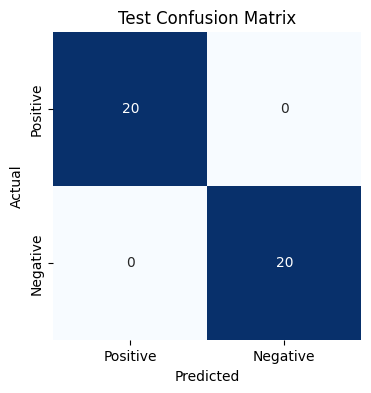

In [39]:
my_model.display_confusion_matrix(confusion_matrix, "Test Confusion Matrix")